# Библиотека PANDAS
### Слуцкая Евгения Алексагдровна, 1032206772, НПМбв-01-20

## 1. Табличные данные и Pandas

Pandas — удобная библиотека для работы с табличными данными в Python, если данных не слишком много и они помещаются в оперативную память вашего компьютера. Несмотря на неэффективность реализации и некоторые проблемы, библиотека стала стандартом в анализе данных. С этой библиотекой мы сейчас и познакомимся.

Основной объект в pandas это DataFrame, представляющий собой таблицу с именованными колонками различных типов, индексом (может быть многоуровневым). DataFrame можно создавать, считывая таблицу из файла или задавая вручную из других объектов.

В этой части потребуется выполнить несколько небольших заданий. Можно пойти двумя путями: сначала изучить материалы, а потом приступить к заданиям, или же разбираться "по ходу". Выбирайте сами.

Материалы:
1. [Pandas за 10 минут из официального руководства](http://pandas.pydata.org/pandas-docs/stable/10min.html)
2. [Документация](http://pandas.pydata.org/pandas-docs/stable/index.html) (стоит обращаться, если не понятно, как вызывать конкретный метод)
3. [Примеры использования функционала](http://nbviewer.jupyter.org/github/justmarkham/pandas-videos/blob/master/pandas.ipynb)

Многие из заданий можно выполнить несколькими способами. Не существуют единственно верного, но попробуйте максимально задействовать арсенал pandas и ориентируйтесь на простоту и понятность вашего кода. Мы не будем подсказывать, что нужно использовать для решения конкретной задачи, попробуйте находить необходимый функционал сами (название метода чаще всего очевидно). В помощь вам документация, поиск и stackoverflow.

In [ ]:
%pylab inline  
# import almost all we need
import pandas as pd

Данные находятся в приложенном файле `chipotle.tsv`

#### 1. Откройте файл с таблицей (не забудьте про её формат). Выведите последние 10 строк.

Посмотрите на данные и скажите, что они из себя представляют, сколько в таблице строк, какие столбцы?

In [5]:
import pandas as pd

file = pd.read_table('chipotle.tsv')

file.tail(10)

,order_id,quantity,item_name,choice_description,item_price
4612,1831,1,Carnitas Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Rice,...",$9.25
4613,1831,1,Chips,NaN,$2.15
4614,1831,1,Bottled Water,NaN,$1.50
4615,1832,1,Chicken Soft Tacos,"[Fresh Tomato Salsa, [Rice, Cheese, Sour Cream]]",$8.75
4616,1832,1,Chips and Guacamole,NaN,$4.45
4617,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour ...",$11.75
4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese...",$11.75
4619,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$11.25
4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettu...",$8.75
4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto...",$8.75


In [6]:
print(f'Количество строк: {len(file)} \nКоличество столбцов: {len(file.columns)}')
print()
print('Названия столбцов:', file.columns.tolist())

Количество строк: 4622 
Количество столбцов: 5

Названия столбцов: ['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']


#### 2.  Ответьте на вопросы:
1. Сколько заказов попало в выборку?
2. Сколько уникальных категорий товара было куплено? (item_name)

In [7]:
print(f'Количество уникальных заказов: {file.order_id.nunique()}')
print(f'Количество уникальных категорий товаров: {file.item_name.nunique()}')

Количество уникальных заказов: 1834
Количество уникальных категорий товаров: 50


#### 3. Есть ли в данных пропуски? В каких колонках? 

In [8]:
file.isnull().sum()

order_id                 0
quantity                 0
item_name                0
choice_description    1246
item_price               0
dtype: int64

Есть пропуски только в колонке 'choice_description'.

Заполните пропуски пустой строкой для строковых колонок и нулём для числовых.

Колонка 'choice_description' является строковой, поэтому пустые ячейки заполним пустой строкой.

In [9]:
import numpy as np

file['choice_description'].fillna('')
file.head()

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


#### 4. Посмотрите внимательнее на колонку с ценой товара. Какого она типа? Создайте новую колонку так, чтобы в ней цена была числом.

Для этого попробуйте применить функцию-преобразование к каждой строке вашей таблицы (для этого есть соответствующая функция).

In [10]:
print("Тип данных колонки с ценой товара: ", file['item_price'].dtype)

file['num_item_price'] = pd.to_numeric(file['item_price'].str.strip('$'))

print("Тип данных колонки с новой ценой товара: ", file['num_item_price'].dtype)
file.head()

Тип данных колонки с ценой товара:  object
Тип данных колонки с новой ценой товара:  float64


,order_id,quantity,item_name,choice_description,item_price,num_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39,2.39
1,1,1,Izze,[Clementine],$3.39,3.39
2,1,1,Nantucket Nectar,[Apple],$3.39,3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98,16.98


Какая средняя/минимальная/максимальная цена у товара? 

In [11]:
file.agg({'num_item_price': ['mean', 'min', 'max']})

,num_item_price
mean,7.464336
min,1.090000
max,44.250000


Удалите старую колонку с ценой.

In [12]:
del file['item_price']
file.head()

,order_id,quantity,item_name,choice_description,num_item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,2.39
1,1,1,Izze,[Clementine],3.39
2,1,1,Nantucket Nectar,[Apple],3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",16.98


#### 5. Какие 5 товаров были самыми дешёвыми и самыми дорогими? (по item_name)

Для этого будет удобно избавиться от дубликатов и отсортировать товары. Не забудьте про количество товара.

In [13]:
items = file.drop_duplicates(['item_name']).copy()
items['single_item_price'] = items['num_item_price'] / items['quantity']

min_price_items = items.sort_values(by='single_item_price').head(5)
max_price_items = items.sort_values(by='single_item_price').tail(5)

print('5 самых дешевых товаров: ', min_price_items[['item_name', 'single_item_price']], sep='\n')
print()
print('5 самых дорогих товаров: ', max_price_items[['item_name', 'single_item_price']], sep='\n')

5 самых дешевых товаров: 
             item_name  single_item_price
34       Bottled Water               1.09
18         Canned Soda               1.09
263  Canned Soft Drink               1.25
6        Side of Chips               1.69
40               Chips               2.15

5 самых дорогих товаров: 
                  item_name  single_item_price
7             Steak Burrito              11.75
168   Barbacoa Crispy Tacos              11.75
1132    Carnitas Salad Bowl              11.89
1229    Barbacoa Salad Bowl              11.89
281        Steak Salad Bowl              11.89


#### 6. Сколько раз клиенты покупали больше 1 Chicken Bowl (item_name)?

In [14]:
chik_bowl = file[file['item_name'] == 'Chicken Bowl'].groupby('order_id').sum()
print('Клиенты покупали больше 1 Chicken Bowl: ', chik_bowl[chik_bowl['quantity'] > 1].shape[0])

Клиенты покупали больше 1 Chicken Bowl:  114


#### 7. Какой средний чек у заказа? Сколько в среднем товаров покупают?

Если необходимо провести вычисления в терминах заказов, то будет удобно сгруппировать строки по заказам и посчитать необходимые статистики.

In [15]:
grouped = file.groupby('order_id').agg({'quantity': 'sum', 'num_item_price': 'sum'})

avg_check = grouped['num_item_price'].mean()
avg_num_items = grouped['quantity'].mean()

print(f'Средний чек у заказа: {avg_check:.2f} $')
print(f'В среднем товаров покупают: {avg_num_items:.2f}')

Средний чек у заказа: 18.81 $
В среднем товаров покупают: 2.71


#### 8. Сколько заказов содержали ровно 1 товар?

In [16]:
grouped = file.groupby('order_id').agg({'quantity': 'sum'})

print('Заказов содержали ровно 1 товар: ', grouped[grouped['quantity'] == 1].shape[0])

Заказов содержали ровно 1 товар:  56


#### 9. Какая самая популярная категория товара? 

In [17]:
grouped = file.groupby('item_name').agg({'quantity': 'sum'})

grouped = grouped.sort_values('quantity', ascending=False)
grouped.head(1)

,quantity
item_name,
Chicken Bowl,761


#### 10. Какие виды Burrito существуют? Какой из них чаще всего покупают? Какой из них самый дорогой? 

In [18]:
burritos = file[file['item_name'].str.contains('Burrito')].copy()

burritos['single_item_price'] = burritos['num_item_price'] / burritos['quantity']
max_burrito_price = burritos.sort_values(by='single_item_price').tail(1)

print('Виды Burrito:', burritos['item_name'].unique(), sep='\n')
print()
print('Количество заказов:', burritos['item_name'].value_counts(), sep='\n')
print()
print('Максимальная цена за буррито: ', max_burrito_price[['item_name', 'single_item_price']], sep='\n')

Виды Burrito:
['Steak Burrito' 'Chicken Burrito' 'Barbacoa Burrito' 'Carnitas Burrito'
 'Veggie Burrito' 'Burrito']

Количество заказов:
item_name
Chicken Burrito     553
Steak Burrito       368
Veggie Burrito       95
Barbacoa Burrito     91
Carnitas Burrito     59
Burrito               6
Name: count, dtype: int64

Максимальная цена за буррито: 
          item_name  single_item_price
4618  Steak Burrito              11.75


#### 11. В каком количестве заказов есть товар, который стоит более 40% от суммы всего чека?

Возможно, будет удобно посчитать отдельно среднюю стоимость заказа, добавить ее в исходные данные и сделать необходимые проверки.

*Данный комментарий стоит воспринимать как подсказку к одному из вариантов решений задания. Если в вашем варианте решения он не нужнен, это не страшно*

In [19]:
order = file.groupby('order_id')['num_item_price'].sum()
file['full_order_price'] = order[file.order_id].values
orders_with_expensive_items = file[file['num_item_price'] > file['full_order_price'] * 0.4]['order_id'].nunique()
print('Количестве заказов =', orders_with_expensive_items)

Количестве заказов = 1624


#### 12. Предположим, что в данных была ошибка и Diet Coke (choice_description), который стоил $1.25, должен был стоить 1.35. Скорректируйте данные в таблицы и посчитайте, на какой процент больше денег было заработано с этого товара. Не забывайте, что количество товара не всегда равно 1.

In [24]:
file.loc[file['choice_description'] == 'Diet Coke', 'num_item_price'] = 1.35

total_revenue_before = (file['num_item_price'] * file['quantity']).sum()
total_revenue_after = (file['num_item_price'].replace({1.25: 1.35}) * file['quantity']).sum()

percentage_increase = ((total_revenue_after - total_revenue_before) / total_revenue_after) * 100

print(f"Процентное увеличение выручки от продажи Diet Coke составляла бы: {percentage_increase:.2f} %")

Процентное увеличение выручки от продажи Diet Coke составляла бы: 0.07 %


#### 13. Создайте новый DateFrame из матрицы, созданной ниже. Назовите колонки index, column1, column2 и сделайте первую колонку индексом.

In [29]:
data = np.random.rand(10, 3)
new_df = pd.DataFrame(data=data[:, 1:], columns=['column1', 'column2'])
new_df

,column1,column2
0,0.266579,0.271141
1,0.985557,0.087377
2,0.204183,0.442240
3,0.941191,0.311538
4,0.327030,0.872437
5,0.677467,0.708155
6,0.388032,0.779507
7,0.933783,0.803918
8,0.456938,0.098927
9,0.780155,0.162568


Сохраните DataFrame на диск в формате csv без индексов и названий столбцов.

In [30]:
new_df.to_csv('my_csv.csv', index=False, header=False)

## 2. Визуализации и matplotlib

При работе с данными часто неудобно делать какие-то выводы, если смотреть на таблицу и числа в частности, поэтому важно уметь визуализировать данные. В этом разделе мы этим и займёмся.

У matplotlib, конечно, же есть [документация](https://matplotlib.org/users/index.html) с большим количеством [примеров](https://matplotlib.org/examples/), но для начала достаточно знать про несколько основных типов графиков:
- plot — обычный поточечный график, которым можно изображать кривые или отдельные точки;
- hist — гистограмма, показывающая распределение некоторое величины;
- scatter — график, показывающий взаимосвязь двух величин;
- bar — столбцовый график, показывающий взаимосвязь количественной величины от категориальной.

В этом задании вы попробуете построить каждый из них. Не менее важно усвоить базовые принципы визуализаций:
- на графиках должны быть подписаны оси;
- у визуализации должно быть название;
- если изображено несколько графиков, то необходима поясняющая легенда;
- все линии на графиках должны быть чётко видны (нет похожих цветов или цветов, сливающихся с фоном);
- если отображена величина, имеющая очевидный диапазон значений (например, проценты могут быть от 0 до 100), то желательно масштабировать ось на весь диапазон значений (исключением является случай, когда вам необходимо показать малое отличие, которое незаметно в таких масштабах).
- сетка на графике помогает оценить значения в точках на глаз, это обычно полезно, поэтому лучше ее отрисовывать.

In [44]:
%matplotlib inline  
import matplotlib.pyplot as plt

На самом деле мы уже импортировали matplotlib внутри %pylab inline в начале задания.

Работать мы будем с той же выборкой покупкок. Добавим новую колонку с датой покупки.

In [45]:
import datetime

start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2018, 1, 31)
delta_seconds = int((end - start).total_seconds())

dates = pd.DataFrame(index=file.order_id.unique())
dates['date'] = [
    (start + datetime.timedelta(seconds=np.random.randint(0, delta_seconds))).strftime('%Y-%m-%d')
    for _ in range(file.order_id.nunique())]

# если DataFrame с покупками из прошлого заказа называется не df, замените на ваше название ниже
file['date'] = file.order_id.map(dates['date'])

#### 14. Постройте гистограмму распределения сумм покупок и гистограмму средних цен отдельных видов продуктов item_name. 

Изображайте на двух соседних графиках. Для этого может быть полезен subplot.

Text(0.5, 1.0, 'гистограмма средних цен отдельных видов продуктов')

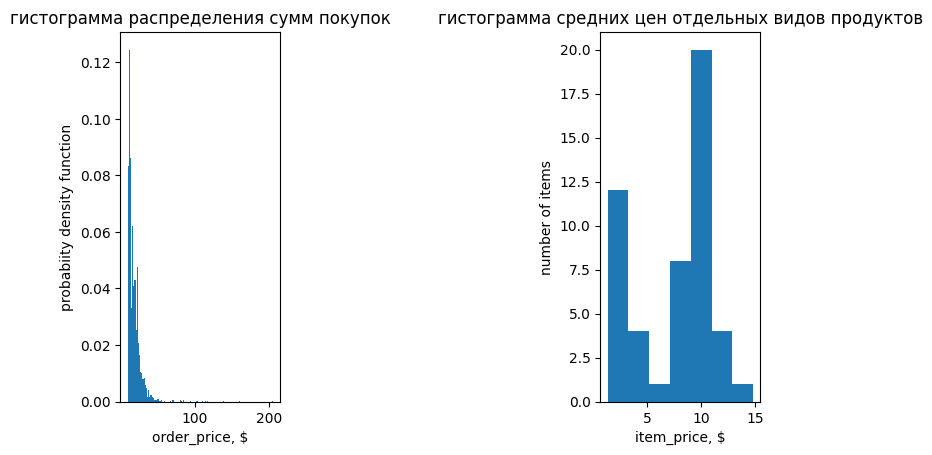

In [50]:
order_sums = file.groupby('order_id')['num_item_price'].sum()
products_prices = file.groupby('item_name')['num_item_price'].mean()
fig, (ax1, ax2) = plt.subplots(ncols=2)
plt.subplots_adjust(wspace=2, left=1, right=2)
ax1.hist(order_sums.values, bins='auto', density=True)
ax1.set_xlabel('order_price, $')
ax1.set_ylabel('probabiity density function')
ax1.set_title('гистограмма распределения сумм покупок')
ax2.hist(products_prices.values, bins='auto')
ax2.set_ylabel('number of items')
ax2.set_xlabel('item_price, $')
ax2.set_title('гистограмма средних цен отдельных видов продуктов')

#### 15. Постройте график зависимости суммы покупок от дней.

Text(0.5, 1.0, 'общая стоимость покупки за день')

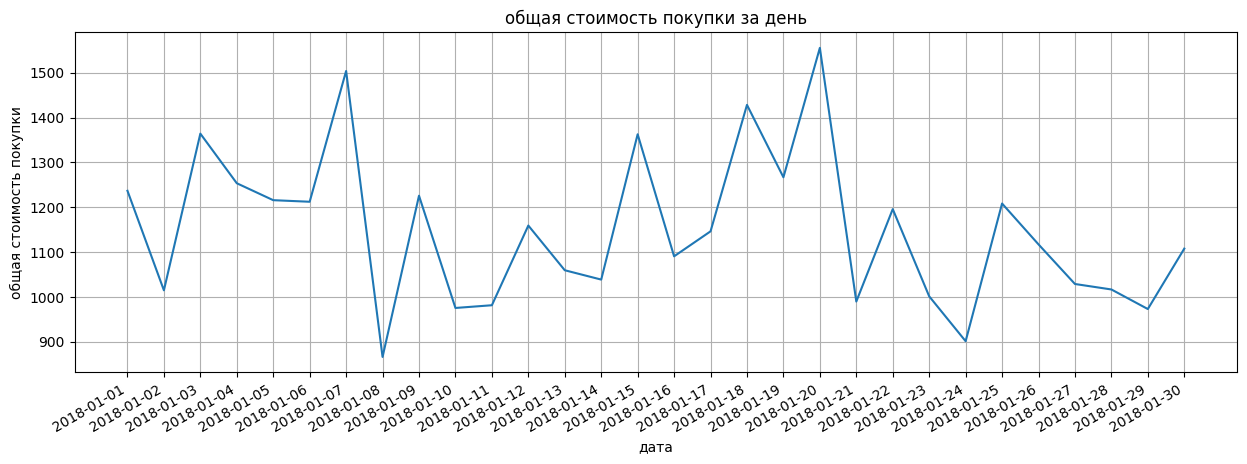

In [54]:
plt.figure(figsize=(15, 5))
date_sums = file.groupby('date')['num_item_price'].sum()
plt.plot(date_sums.index.values, date_sums.values)
plt.gcf().autofmt_xdate()
plt.grid()
plt.xlabel('дата')
plt.ylabel('общая стоимость покупки')
plt.title('общая стоимость покупки за день')

#### 16. Постройте средних сумм покупок по дням недели (bar plot).

Text(0.5, 1.0, 'Общая стоимость покупки в будние дни')

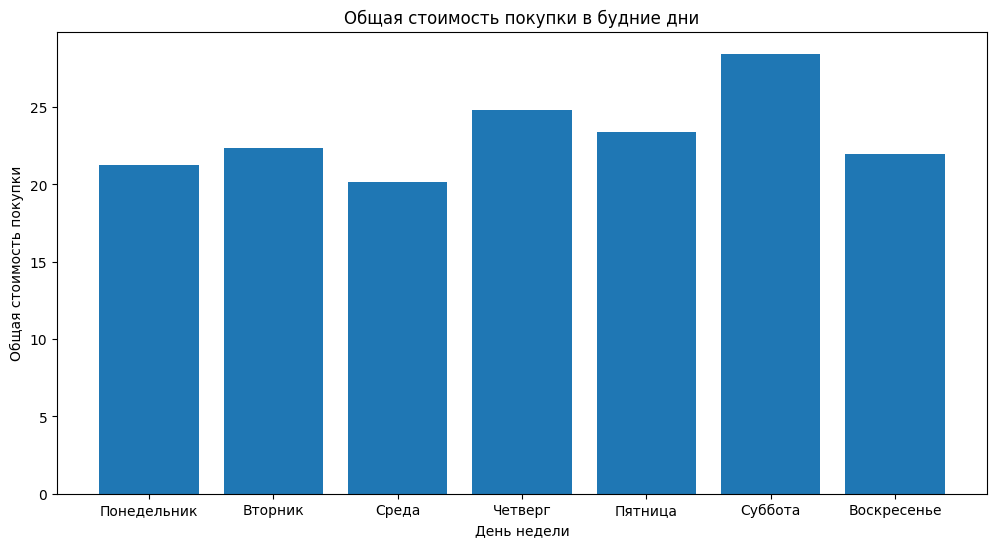

In [64]:
file['date'] = pd.to_datetime(file['date'])
file['day_of_week'] = file['date'].dt.dayofweek
order = file.groupby('order_id')['num_item_price'].sum()
file['full_order_price'] = order[file.order_id].values
avg_purchases = file.groupby('day_of_week')['full_order_price'].mean()

plt.figure(figsize=(12,6))
plt.bar(["Понедельник", "Вторник", "Среда", "Четверг", "Пятница", "Суббота", "Воскресенье"], avg_purchases.values)
plt.xlabel('День недели')
plt.ylabel('Общая стоимость покупки')
plt.title('Общая стоимость покупки в будние дни')

#### 17. Постройте график зависимости денег за товар от купленного количества (scatter plot).

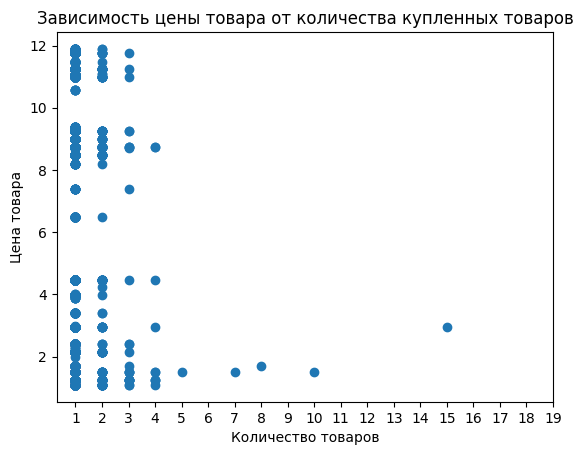

In [70]:
file['single_item_price'] = file['num_item_price'] / file['quantity']
plt.scatter(file['quantity'], file['single_item_price'])
plt.xticks(np.arange(1, 20))
plt.ylabel('Цена товара')
plt.xlabel('Количество товаров')
plt.title('Зависимость цены товара от количества купленных товаров')

plt.savefig('plot.pdf')

#### 18. Сохраните график в формате pdf (так он останется векторизованным).

Сохранение сделала в предыдущем коде

Еще одна билиотека для визуализации: [seaborn](https://jakevdp.github.io/PythonDataScienceHandbook/04.14-visualization-with-seaborn.html). Это настройка над matplotlib, иногда удобнее и красивее делать визуализации через неё. 